# Cab fare prediction

In [1]:
#load required libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from math import sin, cos, sqrt, atan2, radians
from scipy.stats import chi2_contingency
from random import randrange, uniform

In [2]:
#import the dataset
os.chdir("D:/Data Science/Cab Fare")

#lets check the working directory
os.getcwd()

'D:\\Data Science\\Cab Fare'

In [3]:
# Load data
Cab_train = pd.read_csv("train_cab.csv")

# Explore the data

In [ ]:
# lets Check class of the data
type(Cab_train)

In [ ]:
# lets Check the dimensions
Cab_train.shape

In [ ]:
# lets Check names of dataset
Cab_train.columns

In [ ]:
# lets Check first rows of dataset 
Cab_train.head()

In [ ]:
# lets Check last rows of dataset 
Cab_train.tail()

In [ ]:
#lets Check structure of dataset
Cab_train.dtypes

In [ ]:
#lets Check summary of dataset 
Cab_train.describe()

In [ ]:
# Variable Identification 
Cab_train['fare_amount'].dtypes

In [4]:
# lets convert our fare_amount variable from object to numeric data type

Cab_train['fare_amount'] = pd.to_numeric(Cab_train['fare_amount'], errors = "coerce") 

In [5]:
Cab_train['fare_amount'].dtypes

dtype('float64')

In [6]:
# when we tried convert pickup_datetime variable to date format it was throwing error coz of a starnge value in the variable
# So first treat it as NA and drop 

Cab_train.loc[Cab_train['pickup_datetime'] == '43' ,'pickup_datetime'] = np.nan  

Cab_train = Cab_train.drop(Cab_train[Cab_train['pickup_datetime'].isnull()].index, axis = 0)


# Now lets convert pickup_datetime

Cab_train['pickup_datetime'] =  pd.to_datetime(Cab_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [7]:
 # lets see the datatypes after conversion
Cab_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

# Missing Value Analysis

In [8]:
#lets see missing values in our dataset
missing_val = Cab_train.isnull().sum()
missing_val

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [9]:
# Lets drop the observations with missing values because our missing values are not exceed 35%
Cab_train = Cab_train.drop(Cab_train[Cab_train['passenger_count'].isnull()].index,axis = 0)
Cab_train = Cab_train.drop(Cab_train[Cab_train['fare_amount'].isnull()].index,axis = 0)

In [10]:
# Lets check dimensions after missing value analysis

Cab_train.shape

(15986, 7)

In [11]:
# Lets split the pickup_date time variable into year, month, date, day, hour, minute.

Cab_train['year'] =Cab_train['pickup_datetime'].dt.year

Cab_train['month'] = Cab_train['pickup_datetime'].dt.month

Cab_train['date'] = Cab_train['pickup_datetime'].dt.day

Cab_train['day'] = Cab_train['pickup_datetime'].dt.dayofweek

Cab_train['hour'] = Cab_train['pickup_datetime'].dt.hour

Cab_train['minute'] = Cab_train['pickup_datetime'].dt.minute


In [12]:
#lets drop the pickup datetime variable because we splitted into many variables
Cab_train = Cab_train.drop('pickup_datetime',axis=1)

In [13]:
#lets check dimemsion after conversion of pickup datetime
Cab_train.shape

(15986, 12)

In [ ]:
# Lets check summary after conversion
Cab_train.describe()

# Outlier analysis

In [ ]:
#lets remove outlier one by one 
#passenger count
#here in cab maximum passenger count will be 7. above 7 will be considered as outliers
print(Counter(Cab_train['passenger_count']<1))
print(Counter(Cab_train['passenger_count']>7))

In [14]:
#here passenger count has totally 77 outliers where 58 variables are 0 and 19 variables are above 7.
#there is no use of having these data.hence we drop it
Cab_train = Cab_train.drop(Cab_train[Cab_train['passenger_count'] > 7].index, axis=0)
Cab_train = Cab_train.drop(Cab_train[Cab_train['passenger_count'] < 1].index, axis=0)

# verify passenger count
print(Counter(Cab_train['passenger_count'] < 1))
print(Counter(Cab_train['passenger_count'] > 7))

Counter({False: 15909})
Counter({False: 15909})


In [ ]:
#here in latitude ranges from -90 to +90 and longitude ranges from -180 to +180.Beyond these variables considered as an outlier
#by seeing the summary of the dataset, we can see if there is any outliers present in our dataset
Cab_train.describe()

In [ ]:
#from the above summary, we can see that outlier present in only pickup latitude.lets dop that variable
Cab_train = Cab_train.drop(Cab_train[Cab_train['pickup_latitude'] > 90].index, axis=0)
Cab_train = Cab_train.drop(Cab_train[Cab_train['pickup_latitude'] < -90].index, axis=0)

#let verify the dataset
Cab_train.describe()

In [ ]:
#fareamount
# Let use describe function to check min max values and identify outliers 
Cab_train['fare_amount'].describe() 

# We can observe the max value as 54343 and min as -3. Practically its not possible.It clearly defines outliers. 

In [ ]:
#from the above inferences,we can say that the fare amount for a cab cant be in negative as well as it cannot exceed 500
#above and below the values will be considered as outliers and drop it.
Cab_train = Cab_train.drop(Cab_train[Cab_train['fare_amount'] > 500].index, axis=0)
Cab_train = Cab_train.drop(Cab_train[Cab_train['fare_amount'] < 1].index, axis=0)

#lets verify 
Cab_train['fare_amount'].describe()

In [ ]:
# Save numeric names
cnames =['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [ ]:
# Lets visualize boxplots again after outlier removal 


for i in cnames:
    print(i)
    plt.boxplot(Cab_train[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.title('outlier analysis')
    plt.show() 
    

In [ ]:
# Lets check shape dataset after outlier removal 
Cab_train.shape

In [ ]:
Cab_train.head()

In [ ]:
# Now, let's create distance using Haversine Formula 

# Calculates the geodesic distance between two points specified by

# radian latitude/longitude using the Haversine formula 

In [17]:
from math import radians, cos, sin, asin, sqrt

def distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    
    #Define earth radius (km)
    R_earth = 6371
    
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon/2.0)**2
    
    return 2 * R_earth * np.arcsin(np.sqrt(a))

In [18]:
Cab_train['distance'] = distance(Cab_train['pickup_latitude'], 
                                     Cab_train['pickup_longitude'],
                                     Cab_train['dropoff_latitude'] ,
                                     Cab_train['dropoff_longitude'])

In [ ]:
Cab_train.head()

In [ ]:
Cab_train.shape

In [ ]:
# Lets check is there any outliers in this distance variable using describe function
# Lets plot boxplot for distance variable 

plt.boxplot(Cab_train['distance'])

plt.xlabel('distance')

plt.title('outlier analysis')

plt.show()

In [ ]:
Cab_train['distance'].describe() 

In [19]:
#from above inferences, we can see that distance can't be above 130 in our dataset and less than 1 is also not practically possible.
#lets drop those variables.
Cab_train = Cab_train.drop(Cab_train[Cab_train['distance'] > 130].index, axis=0)
Cab_train = Cab_train.drop(Cab_train[Cab_train['distance'] < 1].index, axis=0)

#lets verify the dataset
Cab_train['distance'].describe()

count    12997.000000
mean         3.960771
std          4.842924
min          1.000067
25%          1.663539
50%          2.583273
75%          4.447891
max        129.950482
Name: distance, dtype: float64

In [ ]:
# Lets check the boxplot after removing outliers 

plt.boxplot(Cab_train['distance'])

plt.xlabel('distance')

plt.title('outlier analysis')

plt.show()

In [ ]:
#lets save our preprocessed data
df = Cab_train
Cab_train = df

# Data visualization

In [ ]:
Cab_train.columns

In [ ]:
# Univariate Analysis 


#  fare_amount 

plt.figure(figsize=(8,8))
sns.countplot(x='fare_amount',data = Cab_train,color='blue')

In [ ]:
# pickup_longitude

plt.figure(figsize=(8,8))
sns.countplot(x='pickup_longitude',data = Cab_train,color='blue')


In [ ]:
# pickup_latitude
plt.figure(figsize=(8,8))
sns.countplot(x='pickup_latitude',data = Cab_train,color='blue')


In [ ]:
# dropoff_longitude
plt.figure(figsize=(8,8))
sns.countplot(x='dropoff_longitude',data = Cab_train,color='blue')


In [ ]:
#dropoff_latitude
plt.figure(figsize=(8,8))
sns.countplot(x='dropoff_latitude',data = Cab_train,color='blue')


In [ ]:
# passenger_count

plt.figure(figsize=(8,8))
sns.countplot(x='passenger_count',data = Cab_train,color='blue')

#based on the passengers, we can see that single passengers travelled higher

In [ ]:
# distance
#distance
# plot Distance
plt.figure(figsize=(15,7))
plt.hist(Cab_train['distance'], bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')
#Maximum number of passengers are travelled less than 20km

In [ ]:
# Bivariate Analysis

# Visualization between fare_amount and years.
sns.scatterplot(x='year',y='fare_amount',data = Cab_train)
# Based on the scatterplot, in year 2012 and 2013 there were rides which got high fare_amount and very low on year 2015

In [ ]:
# Visualization between fare_amount and months.
sns.scatterplot(x='month',y='fare_amount',data = Cab_train)
# Based on the scatterplot,We can see  March month fare amount is very high and low in July month.

In [ ]:
# Visualization between fare_amount and weekday.
sns.scatterplot(x='day',y='fare_amount',data = Cab_train)

# Based on the scatterplot,We can see that Friday ride has the highest fare_amount

In [ ]:
# Visualization between fare_amount and time.

sns.scatterplot(x='hour',y='fare_amount',data = Cab_train)
# Rides taken during 6 pm to 8 pm gives highest fare_amount

In [ ]:
# Visualization between fare_amount and passenger_count
sns.scatterplot(x="passenger_count",y="fare_amount",data=Cab_train)

In [ ]:
# Visualization between fare_amount and distance
sns.scatterplot(x="distance",y="fare_amount",data=Cab_train)
# we can see as the distance increases fare amount also increases 

# Feature selection

In [ ]:
print(Cab_train.columns)

In [ ]:
#lets drop minute variable
Cab_train =  Cab_train.drop('minute',axis = 1)
Cab_train.shape

In [ ]:
Cab_train.head()

In [ ]:
Cab_train.dtypes

In [15]:
# Lets convert passenger_count into int64 data type
Cab_train['passenger_count'] = Cab_train['passenger_count'].astype('int64')


# Similarly convert year,month,date,day,hour as these comes under categorical variables 
Cab_train['year'].unique()

Cab_train['month'].unique()

Cab_train['date'].unique()

Cab_train['day'].unique()

Cab_train['hour'].unique()

Cab_train['year'] = Cab_train['year'].astype('object')

Cab_train['month'] = Cab_train['month'].astype('object')

Cab_train['date'] = Cab_train['date'].astype('object')

Cab_train['day'] = Cab_train['day'].astype('object')

Cab_train['hour'] = Cab_train['hour'].astype('object')


In [16]:
Cab_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                  object
month                 object
date                  object
day                   object
hour                  object
minute                 int64
dtype: object

In [ ]:
Cab_train.columns

In [20]:
# So lets define numeric and categorical variables to find significant variables to build a model

# Storing continuous variables into an  object called cnames 

cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count','distance']

# Storing categorical variables into catnames object

catnames = ['year','month', 'date', 'day', 'hour']

In [21]:
##Correlation analysis
#Correlation plot

df_corr = Cab_train.loc[:,cnames]


                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000         -0.000115        -0.000186   
pickup_longitude     -0.000115          1.000000        -0.580189   
pickup_latitude      -0.000186         -0.580189         1.000000   
dropoff_longitude    -0.000015          0.999782        -0.580222   
dropoff_latitude      0.000165         -0.992110         0.584874   
passenger_count      -0.004727         -0.009109         0.001941   
distance              0.016402          0.007539         0.042892   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                -0.000015          0.000165        -0.004727   
pickup_longitude            0.999782         -0.992110        -0.009109   
pickup_latitude            -0.580222          0.584874         0.001941   
dropoff_longitude           1.000000         -0.992088        -0.009150   
dropoff_latitude           -0.992088          1.000000         0.009570 

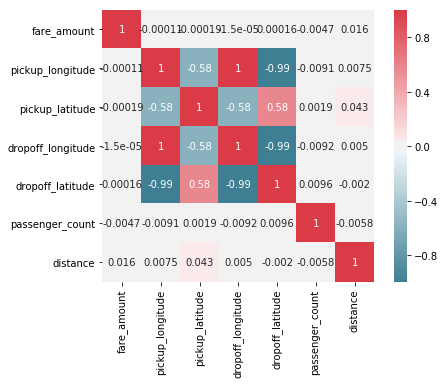

In [22]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

print(corr)# From correlation analysis we can say distance is significant variable to pass in to the model 

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [ ]:
# Anova Test is performed between catnames (categorical independent variables) & fare_amount(continuous target variable) 

import statsmodels.api as sm

from statsmodels.formula.api import ols

for i in catnames:
    mod = ols('fare_amount' + '~' + i, data = Cab_train).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)
    
# From the anova result, we can observe Date ,weekday

# has p value > 0.05, so delete these variables not consider in model.

In [ ]:
# After correlation and ANOVA test we need to remove these variables 
# Cat variables - weekday and date(which has p-value>0.05)

Cab_train = Cab_train.drop('date', axis = 1)
Cab_train = Cab_train.drop('day', axis = 1)


In [ ]:
# Lets cross check shape of dataset after feature selection
Cab_train.shape

In [ ]:
Cab_train.head()

In [ ]:
# Storing final categorical variables into cat_var object for model development 
Catnmaes = ['year', 'month', 'hour']

# Feature Scaling

In [ ]:
# Lets check the distribution of our data

In [ ]:
# passenger_count
sns.distplot(Cab_train['passenger_count'],bins='auto',color='blue')
plt.title("Distribution of passenger_count")
plt.ylabel("Density")
plt.show()

In [ ]:
# distance variable
sns.distplot(Cab_train['distance'],bins='auto',color='blue')
plt.title("Distribution of distance")
plt.ylabel("Density")
plt.show()

In [ ]:
# The distance variable is right skewed we can reduce this skewness using log transformation
Cab_train['distance'] = np.log(Cab_train['distance'])

In [ ]:
# Cab_train['fare_amount'] = np.log(Cab_train['fare_amount'])

In [ ]:
Cab_train.head()

In [ ]:
# We shall check for normality again after log transformation of distance variable

sns.distplot(Cab_train['distance'],bins='auto',color='blue')
plt.title("Distribution of distance after log transformation")
plt.ylabel("Density")
plt.show()

# We can observe now, after applying log function, the data is normalised

# Model development 

In [ ]:
# Load Required libraries for model development 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Lets Divide the data into train and test set 

X= Cab_train.drop(['fare_amount'],axis=1)
y= Cab_train['fare_amount']

In [ ]:
# Now Split the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [ ]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [ ]:
# Linear Regression model

In [ ]:
np.asarray(Cab_train)

In [ ]:
#lets build Linear Regression model on train data
LinearRegression_model = LinearRegression().fit(X_train, y_train)

In [ ]:
# Model prediction on  train data
LinearRegression_train= LinearRegression_model.predict(X_train)

# Model prediction on test data
LinearRegression_test= LinearRegression_model.predict(X_test)

# MAPE for train data
MAPE_train= MAPE(y_train,LinearRegression_train)

# MAPE for on test data
MAPE_test= MAPE(y_test,LinearRegression_test)

# r2 value for train data
r2_train= r2_score(y_train,LinearRegression_train)

# r2 value for test data-
r2_test=r2_score(y_test,LinearRegression_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LinearRegression_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LinearRegression_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

In [ ]:
Error_MetricsLT = {'Model Name': ['Linear Regression'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}

LinearRegression_Results = pd.DataFrame(Error_MetricsLT)
LinearRegression_Results

In [ ]:
#Decision tree

In [ ]:
# Decision tree for regression
DecisionTree_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Model prediction on train data
DecisionTree_train= DecisionTree_model.predict(X_train)

# Model prediction on test data
DecisionTree_test= DecisionTree_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,DecisionTree_train)

# Model performance on test data
MAPE_test= MAPE(y_test,DecisionTree_test)

# r2 value for train data
r2_train= r2_score(y_train,DecisionTree_train)

# r2 value for test data
r2_test=r2_score(y_test,DecisionTree_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DecisionTree_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DecisionTree_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

In [ ]:
Error_MetricsDT = {'Model Name': ['Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
DecisionTree_Results = pd.DataFrame(Error_MetricsDT)
DecisionTree_Results

In [ ]:
#Random search cv in decision tree

In [ ]:
# Import libraries 
from sklearn.model_selection import RandomizedSearchCV

RandomDecisionTree = DecisionTreeRegressor(random_state = 0)
depth = list(range(1,20,2))
random_search = {'max_depth': depth}

# Lets build a model using above parameters on train data 
RandomDecisionTree_model= RandomizedSearchCV(RandomDecisionTree,param_distributions= random_search,n_iter=5,cv=5)
RandomDecisionTree_model= RandomDecisionTree_model.fit(X_train,y_train)


In [ ]:
# Lets look into best fit parameters
best_parameters = RandomDecisionTree_model.best_params_
print(best_parameters)

In [ ]:
# Again rebuild decision tree model using randomsearch best fit parameter ie
# with maximum depth = 1
RDT_best_model = RandomDecisionTree_model.best_estimator_
print(RDT_best_model)

In [ ]:
# Prediction on train data 
RDT_train = RDT_best_model.predict(X_train)

# Prediction on test data 
RDT_test = RDT_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data 
MAPE_train= MAPE(y_train,RDT_train)

# MAPE for test data 
MAPE_test= MAPE(y_test,RDT_test)

# Rsquare for train data
r2_train= r2_score(y_train,RDT_train)

# Rsquare for test data
r2_test=r2_score(y_test,RDT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RDT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RDT_test))


# Lets print the results 
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RDT_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

In [ ]:
Error_MetricsRDT = {'Model Name': ['Random Search CV Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomDecisionTree_Results = pd.DataFrame(Error_MetricsRDT)
RandomDecisionTree_Results

In [ ]:
# Grid Search CV in Decision Tree

In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridDecisionTree= DecisionTreeRegressor(random_state=0)
depth= list(range(1,20,2))
grid_search= {'max_depth':depth}

# Lets build a model using above parameters on train data
GridDecisionTree_model= GridSearchCV(GridDecisionTree,param_grid=grid_search,cv=5)
GridDecisionTree_model= GridDecisionTree_model.fit(X_train,y_train)

In [ ]:
# Lets look into best fit parameters from gridsearch cv DT
best_parameters = GridDecisionTree_model.best_params_
print(best_parameters)

In [ ]:
# Again rebuild decision tree model using gridsearch best fit parameter ie
# with maximum depth = 1
GDT_best_model = GridDecisionTree_model.best_estimator_

In [ ]:
# Prediction on train data 
GDT_train = GDT_best_model.predict(X_train)

# Prediction on train data  test data-
GDT_test = GDT_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data 
MAPE_train= MAPE(y_train,GDT_train)

# MAPE for test data 
MAPE_test= MAPE(y_test,GDT_test)

# Rsquare for train data
r2_train= r2_score(y_train,GDT_train)

# Rsquare for train data
r2_test=r2_score(y_test,GDT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GDT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GDT_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GDT_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


In [ ]:
Error_MetricsGDT = {'Model Name': ['Grid Search CV Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
GridDecisionTree_Results = pd.DataFrame(Error_MetricsGDT)
GridDecisionTree_Results

In [ ]:
#Random forest

In [ ]:
# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Prediction on train data
RF_train= RF_model.predict(X_train)

# Prediction on test data
RF_test= RF_model.predict(X_test)

# MAPE For train data
MAPE_train= MAPE(y_train,RF_train)

# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)

# Rsquare  For train data
r2_train= r2_score(y_train,RF_train)

# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


In [ ]:
Error_MetricsRF = {'Model Name': ['Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomForest_Results = pd.DataFrame(Error_MetricsRF)
RandomForest_Results

In [ ]:
# Random Search CV in Random Forest

In [ ]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

# Lets build a model using above parameters on train data
RandomRandomForest_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=5,cv=5)
RandomRandomForest_model= RandomRandomForest_model.fit(X_train,y_train)

In [ ]:
# Best parameters for model
best_parameters = RandomRandomForest_model.best_params_
print(best_parameters)

In [ ]:
# Again rebuild random forest  model using gridsearch best fit parameter
#n_estimators: 59, max_depth: 3
RRF_best_model = RandomRandomForest_model.best_estimator_

In [ ]:
# Prediction on train data
RRF_train = RRF_best_model.predict(X_train)

# Prediction on test data
RRF_test = RRF_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data 
MAPE_train= MAPE(y_train,RRF_train)

# MAPE for test data
MAPE_test= MAPE(y_test,RRF_test)

# Rsquare for train data
r2_train= r2_score(y_train,RRF_train)

# Rsquare for test data
r2_test=r2_score(y_test,RRF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RRF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RRF_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RRF_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

In [ ]:
Error_MetricsRSRF = {'Model Name': ['Random Search CV Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomSearchRandomForest_Results = pd.DataFrame(Error_MetricsRSRF)

In [ ]:
RandomSearchRandomForest_Results

In [ ]:
# Grid search CV in Random Forest

In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [ ]:
# Lets build a model using above parameters on train data using random forest grid search cv 
GridRandomForest_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=5)
GridRandomForest_model= GridRandomForest_model.fit(X_train,y_train)

In [ ]:
# Best fit parameters for model
best_parameters_GRF = GridRandomForest_model.best_params_
print(best_parameters_GRF)

In [ ]:
# Again rebuild random forest model using gridsearch best fit parameter 
#n_estimators: 19, max_depth: 3
GRF_best_model = GridRandomForest_model.best_estimator_

In [ ]:
# Prediction on train data
GRF_train = GRF_best_model.predict(X_train)

# Prediction on test data
GRF_test = GRF_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data
MAPE_train= MAPE(y_train,GRF_train)

# MAPE for test data
MAPE_test= MAPE(y_test,GRF_test)

# Rsquare for train data
r2_train= r2_score(y_train,GRF_train)

# Rsquare for test data
r2_test=r2_score(y_test,GRF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GRF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GRF_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GRF_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

In [ ]:
Error_MetricsGSRF = {'Model Name': ['Grid search CV Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
GridSearchRandomForest_Results = pd.DataFrame(Error_MetricsGSRF)
GridSearchRandomForest_Results

In [ ]:
Final_Results = pd.concat([LinearRegression_Results,
                                DecisionTree_Results,
                                RandomDecisionTree_Results,
                                GridDecisionTree_Results,
                                RandomForest_Results,
                                RandomSearchRandomForest_Results,
                                GridSearchRandomForest_Results,], ignore_index=True, sort =False)
Final_Results

In [ ]:
# From above results Random Forest model have optimum values and this
# Random forest algorithm is good for our data 

# Model evaluation for test data

In [ ]:
#lets import test data and apply random forest model for prediction

In [ ]:
# Import the test dataset 
Cab_test = pd.read_csv("test.csv")

In [ ]:
# Exploring  the  test data 

# Check class of the data
type(Cab_test)

In [ ]:
#Check the dimensions(no of rows and no of columns)
Cab_test.shape

In [ ]:
#Check names of dataset(no need of renaming variables)
Cab_test.columns 

# we can see here there is no fare_amount varible we need to predict using RF_model

In [ ]:
#Check top rows of dataset 
Cab_test.head()

In [ ]:
#Check bottom rows of dataset 
Cab_test.tail()

In [ ]:
#Check structure of dataset(data structure of each variable)
Cab_test.dtypes

In [ ]:
# we have to change pickup_datetime from object to datetime

Cab_test['pickup_datetime'] =  pd.to_datetime(Cab_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

print(Cab_test.dtypes) 
# we can see out pickupdate time is converted to date format

# Let us see our data after data type conversion of variables

print(Cab_test.head())

In [ ]:
# Lets split the pickup_date time variable into year, month, date, day, hour, minute.

Cab_test['year'] =Cab_test['pickup_datetime'].dt.year

Cab_test['month'] = Cab_test['pickup_datetime'].dt.month

Cab_test['date'] = Cab_test['pickup_datetime'].dt.day

Cab_test['day'] = Cab_test['pickup_datetime'].dt.dayofweek

Cab_test['hour'] = Cab_test['pickup_datetime'].dt.hour

In [ ]:
# Lets cross check our test data
Cab_test.head()

In [ ]:
# Missing Value Analysis for testdata

In [ ]:
# Total number of missing values present in whole datset 
Cab_test.isnull().sum() 

# no missing values 

In [ ]:
# Outlier analysis ------------------------------------
# lets check description of variables there we can figure out outliers easily
Cab_test.describe()

#no outliers 

In [ ]:
# Now, let's create distance using Haversine Formula 

# Calculates the geodesic distance between two points specified by

# radian latitude/longitude using the Haversine formula 

# we already defined these function in Cab_train dataset 

# Lets apply the function on logitudes and lattitudes to derive distance 


Cab_test['distance'] = distance(Cab_test['pickup_latitude'], 
                                     Cab_test['pickup_longitude'],
                                     Cab_test['dropoff_latitude'] ,
                                     Cab_test['dropoff_longitude'])

In [ ]:
# cross check few observation after creating new variable distance 
Cab_test.head()

In [ ]:
# Lets check is there any outliers in this distance variable using describe function
Cab_test['distance'].describe() # we can see 0 so delete such observations

In [ ]:
Counter(Cab_test['distance'] < 1)

In [ ]:
#insted of dropping those variables,let substitute with mean
Cab_test.loc[Cab_test.distance < 1,'distance'] = Cab_test['distance'].mean()

In [ ]:
print(Cab_test['distance'].describe())

In [ ]:
# Lets delete pickup_datetime as we derived year,month,date,day,hour,minute
Cab_test = Cab_test.drop('pickup_datetime', axis = 1)

In [ ]:
Cab_test.head()

In [ ]:
# During model development, we deleted few varaibles based on anova test and correlation analysis 

# The variables in the test case should exactly match with the variables in the trained model 

Cab_test.columns



In [ ]:
Cab_test = Cab_test.drop('date', axis = 1)
Cab_test = Cab_test.drop('day', axis = 1)
print(Cab_test.columns)

In [ ]:
# Normalizing distance variable 

# We shall check for normality for distance. Let's first check about the skewness of the distance variable

sns.distplot(Cab_test['distance'],bins='auto',color='blue')
plt.title("Distribution of variable distance")
plt.ylabel("Density")
plt.show()

# We can observe, the variable is right skewed.

In [ ]:
# Using log function to reduce the skewness in distance

Cab_test['distance'] = np.log(Cab_test['distance'])

In [ ]:
# We shall check for normality for distance after taking log function
sns.distplot(Cab_test['distance'],bins='auto',color='blue')
plt.title("Distribution of variable distance")
plt.ylabel("Density")
plt.show()

# We can observe now, after applying log function, the data is normalised

In [ ]:
Cab_test.head()

In [ ]:
# Now lets apply our RF model on this Test_Cab data after cleaning this data 

Predictions_Cab_test = RF_model.predict(Cab_test)

In [ ]:
Predictions_Cab_test

In [ ]:
# Fianlly creating new variable - Predicted Fare Amount

Cab_test['Predicted_Fare_Amount'] = Predictions_Cab_test

In [ ]:
# Lets see our data 
Cab_test.head()

In [ ]:
Cab_test['Predicted_Fare_Amount'].describe()

In [ ]:
Test_Cab.head(6)

In [ ]:
#save output results 
Test_Cab.to_csv("Cabfarepredicted.csv", index = False)